### Contents
* Import
* Data Manipulation
* decision tree/ANN

## 1 Import

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:

#import data
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Data Specilization ML\1 DATA\MANIPULATED DATA\df_scaled.csv"))

In [3]:
#import pleasant weather data
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

## 2 Data Manipulation

df.columns.tolist()

pleasantdf.columns.tolist()

In [4]:
#dropping unrelated station data from main dataset
activedf=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max','Unnamed: 0'])

In [5]:
activedf.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
#Create an 'X' and y df by dropping the unneeded columns.
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [7]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [8]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [9]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

## 3 Decision Trees, ANN

[Text(0.37038566015747776, 0.9821428571428571, 'x[49] <= 0.403\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.06574987537778329, 0.9464285714285714, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10782\nvalue = [[10123, 659]\n[9060, 1722]\n[9508, 1274]\n[10694, 88]\n[10782, 0]\n[10156, 626]\n[10703, 79]\n[9831, 951]\n[10709, 73]\n[8020, 2762]\n[10373, 409]\n[10535, 247]\n[10782, 0]\n[10531, 251]\n[10618, 164]]'),
 Text(0.01881691975603674, 0.9107142857142857, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7547\nvalue = [[7428, 119]\n[6863, 684]\n[7197, 350]\n[7535, 12]\n[7547, 0]\n[7504, 43]\n[7525, 22]\n[7332, 215]\n[7523, 24]\n[7547, 0]\n[7398, 149]\n[7517, 30]\n[7547, 0]\n[7518, 29]\n[7534, 13]]'),
 Text(0.007613461618386601, 0.875, 'x[78] <= 0.243\ngini = 0.004\nsamples =

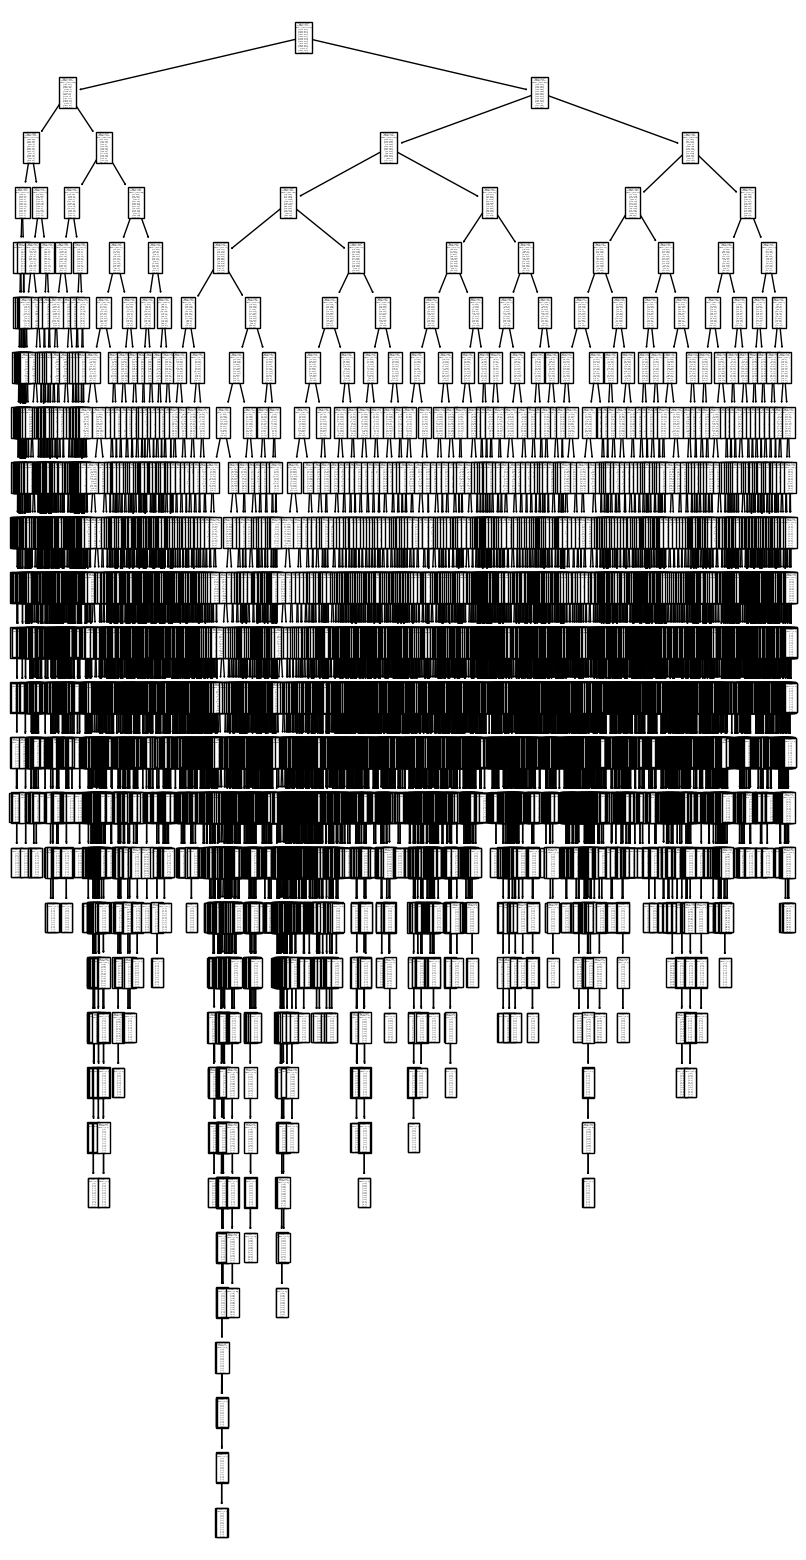

In [12]:
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [13]:
#cross validation method
y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6050425045514372


In [14]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4234
           1       1.00      1.00      1.00      5996
           2       1.00      1.00      1.00      5579
           3       1.00      1.00      1.00      3322
           4       1.00      1.00      1.00      3681
           5       1.00      1.00      1.00      3714
           6       1.00      1.00      1.00      2776
           7       1.00      1.00      1.00      4786
           8       1.00      1.00      1.00      3566
           9       1.00      1.00      1.00      7696
          10       1.00      1.00      1.00      3570
          11       1.00      1.00      1.00      2646
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       863

   micro avg       1.00      1.00      1.00     55346
   macro avg       0.93      0.93      0.93     55346
weighted avg       1.00   

C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [15]:
locations = list({x.split("_")[0] for x in activedf.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


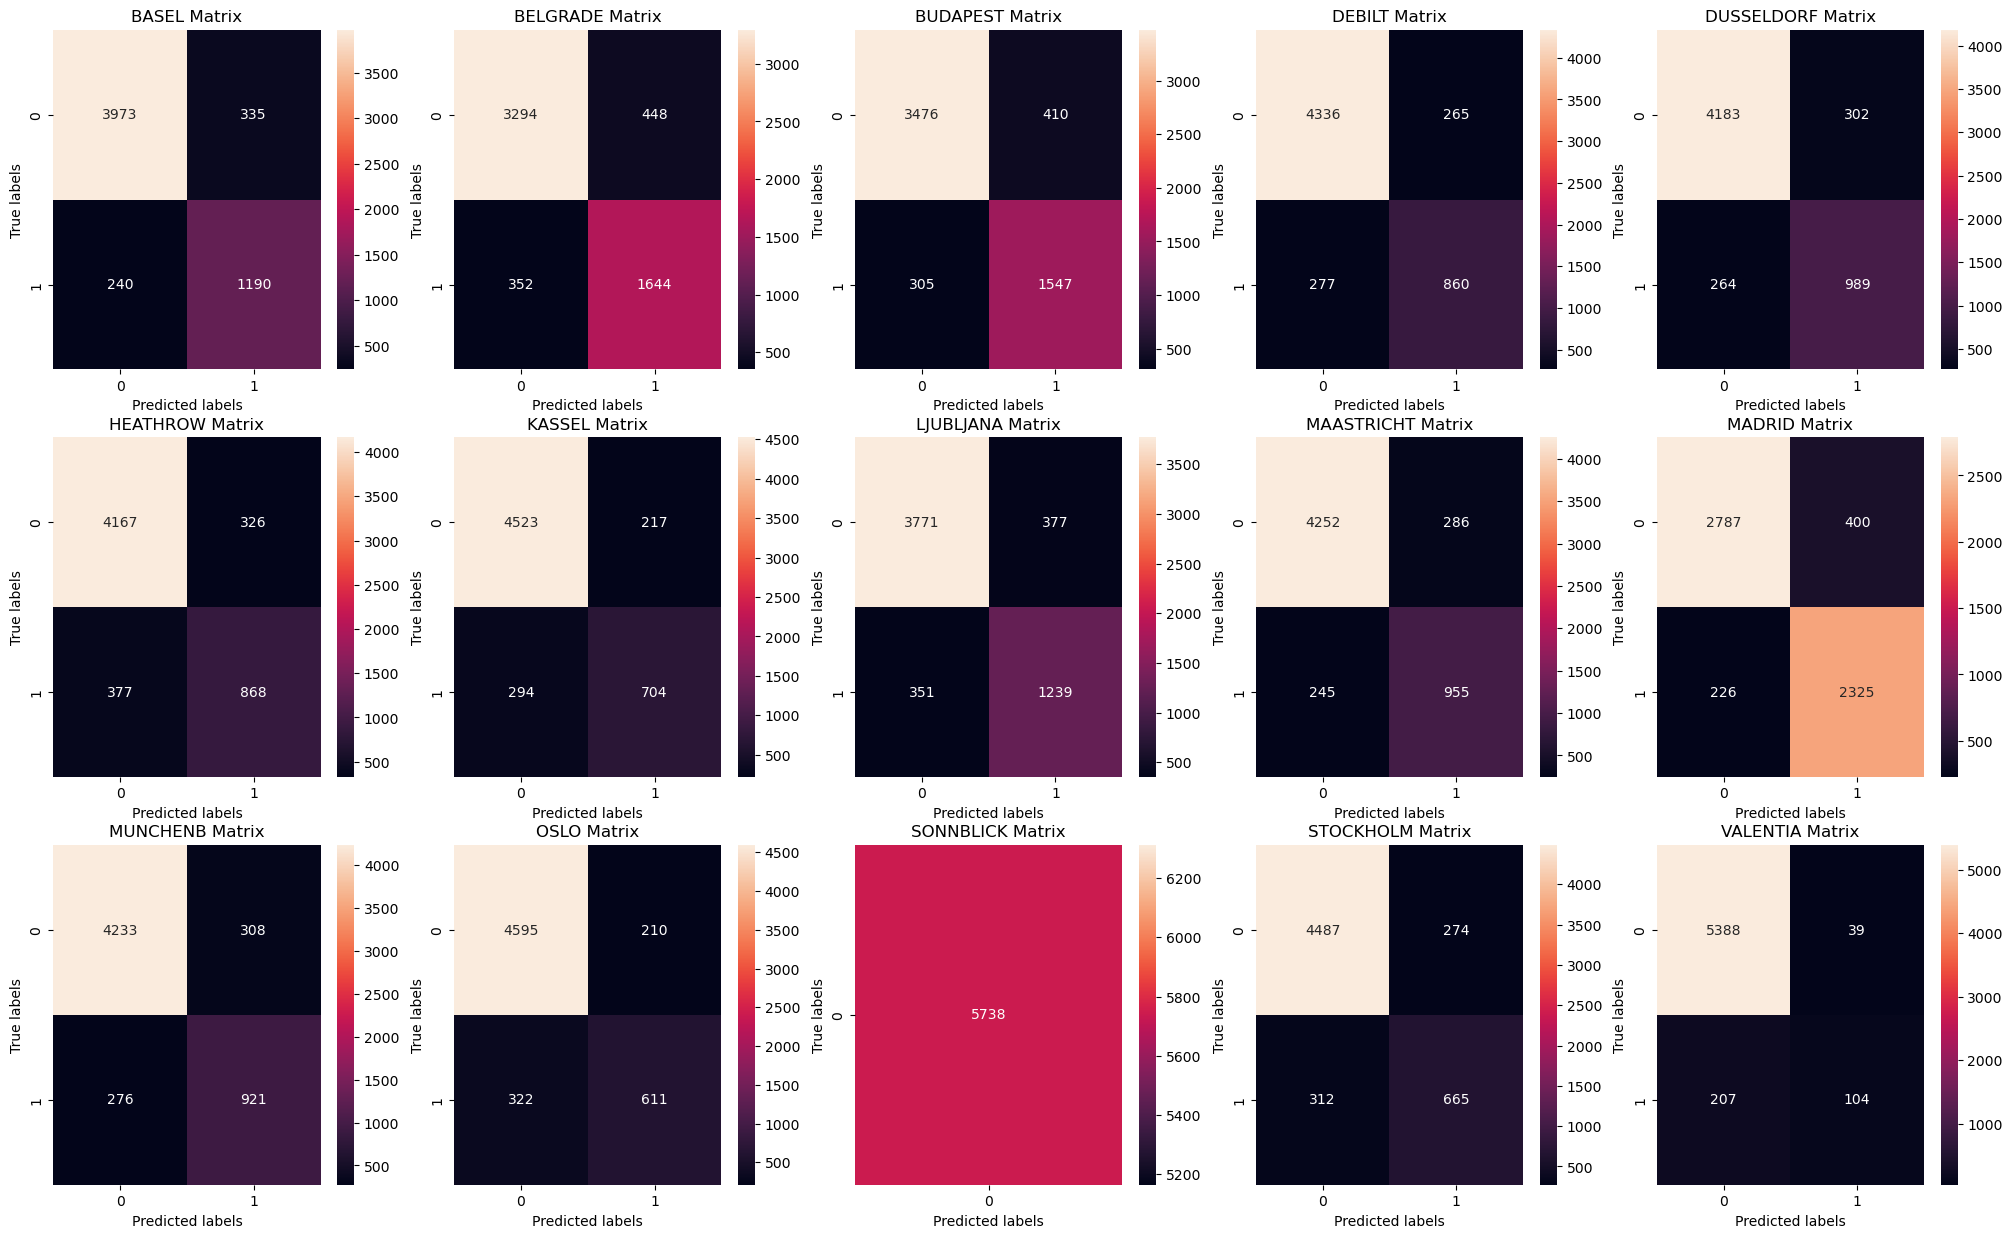

In [16]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1